# Testing the DFA module
Import required libraries such as torch, DFA and matplotlib.pyplot
And override the default value of pixels and figure dpi. In normal cases, the data quantity would be large enough to make the plot look good. 

In [49]:
import torch
import DFA.DFA as DFA
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
DFA.px = 1/100

## Generate a simple data set using pytorch

In [50]:
x_data = torch.tensor([30.8930, 32.0070, 33.1470, 34.2900, 35.4100, 36.5270, 37.6670,
                       38.8070, 39.9570, 41.0830, 42.2200, 43.3530, 44.4730, 45.5870,
                       46.6930, 47.8070, 48.9200, 50.0330, 51.1330, 52.2400, 53.3430,
                       54.4430, 55.5500, 56.6570, 57.7530, 58.8570, 59.9630, 61.0630,
                       62.2000, 63.3370, 64.4730, 65.6100, 66.7370, 67.8470, 68.9530,
                       70.0630, 71.1870, 72.3000, 73.3970, 74.4970, 75.6200, 76.7600,
                       77.8930, 79.0170, 80.1370, 81.2770, 82.4100, 83.5230, 84.6470,
                       85.7830, 86.8930, 88.0270, 89.1470, 90.2600, 91.3800, 92.5030,
                       93.6400, 94.7900, 95.9330, 97.1000, 98.2500, 99.4670, 100.6430,
                       101.7970, 102.9500, 104.0900, 105.2330, 106.3770, 107.4970, 108.6400,
                       109.8030, 110.9670, 112.1600, 113.3170, 114.4700, 115.5970, 116.7170,
                       117.8430, 119.0330, 120.1930, 121.3500, 122.5030, 123.6170, 124.7670,
                       125.9130, 127.0530, 128.1770, 129.3030, 130.4300, 131.5300, 132.6600,
                       133.7930, 134.8970, 136.0100, 137.1130, 138.2230, 139.3230, 140.4270,
                       141.5270, 142.6330, 143.7670, 144.8930, 146.0670, 147.2430, 148.3800,
                       149.5170, 150.6570, 151.8100, 152.9730, 154.0970, 155.2070, 156.3270,
                       157.4500, 158.5770, 159.7100, 160.8370, 161.9630, 163.0700, 164.1900,
                       165.2900, 166.3900, 167.4900, 168.6100, 169.7100, 170.8270, 171.9530,
                       173.1000, 174.2700, 175.4370, 176.5970, 177.7570, 178.9130, 180.0370,
                       181.1570, 182.2770, 183.3900, 184.4930, 185.5830, 186.6900, 187.7970,
                       188.9270, 190.0900, 191.2370, 192.3500, 193.4900, 194.6530, 195.7830,
                       196.9100, 198.0370, 199.1730, 200.3030, 201.4370, 202.5670, 203.7070,
                       204.8430, 205.9900, 207.1430, 208.2900, 209.4270, 210.5800, 211.7570,
                       212.9270, 214.1000, 215.2700, 216.4330, 217.5900, 218.7600, 219.9170,
                       221.0800, 222.2400, 223.4070, 224.6030, 225.7770, 226.9370, 228.0900,
                       229.2400, 230.3600, 231.5070, 232.6230, 233.7800, 234.9330, 236.0800,
                       237.2400, 238.4030, 239.5430, 240.6930, 241.8630, 243.0170, 244.1800,
                       245.3400, 246.4930, 247.6230, 248.7400, 249.8600, 250.9630, 252.0970,
                       253.2370, 254.3630, 255.4870, 256.6130, 257.7230, 258.8630, 260.0400,
                       261.1730, 262.3070, 263.4570, 264.6330, 265.8030, 266.9300, 268.0500,
                       269.1700, 270.3030, 271.4300, 272.5700, 273.6970, 274.8270, 275.9600,
                       277.0930, 278.2270, 279.3770, 280.4970, 281.6230, 282.7700, 283.9000,
                       285.0500, 286.1900, 287.3300, 288.4970, 289.6600, 290.8270, 292.0200,
                       293.2000, 294.3630, 295.5030, 296.6500, 297.7970, 298.9330, 300.0830,
                       301.2170, 302.3300, 303.4800, 304.6470, 305.7830, 306.9530, 308.1100,
                       309.2730, 310.4230, 311.5430, 312.7100, 313.8700, 315.0370, 316.1770,
                       317.3300, 318.4770, 319.6130, 320.7630, 321.9200, 323.0900, 324.2800,
                       325.4400, 326.6370, 327.7970, 328.9570, 330.1270, 331.2830, 332.4470,
                       333.5970, 334.7400, 335.8800, 337.0270, 338.1770, 339.3770, 340.5430,
                       341.7200, 342.8730, 344.0370, 345.1830, 346.3530, 347.5100, 348.6500,
                       349.7970, 350.9400, 352.1100, 353.2570, 354.4000, 355.5400, 356.6800,
                       357.8130, 358.9430, 360.0700, 361.1900, 362.3170, 363.4600, 364.6030,
                       365.7600, 366.8970, 368.0330, 369.1600, 370.2900, 371.4100, 372.5500,
                       373.7100, 374.8970, 376.0400, 377.1530, 378.3030, 379.4800, 380.6430,
                       381.7700, 382.8970, 384.0300, 385.1630, 386.2900, 387.4500, 388.6170,
                       389.7570, 390.8970, 392.0230, 393.1500, 394.2830, 395.4130, 396.5500,
                       397.6800, 398.8170, 399.9470, 401.0800, 402.2370, 403.4000, 404.5630,
                       405.7270, 406.9070, 408.0870, 409.2400, 410.3900, 411.5300, 412.6600,
                       413.8130, 414.9600, 416.0900, 417.2430, 418.3770, 419.5230, 420.7100,
                       421.8430, 422.9830, 424.1030, 425.2400, 426.3800, 427.5200, 428.6500,
                       429.7930, 430.9270, 432.0530, 433.2030, 434.3370, 435.4530, 436.6070,
                       437.7730, 438.9270, 440.0930, 441.2630, 442.4600, 443.6830, 444.8470,
                       446.0200, 447.2130, 448.3670, 449.5330, 450.7070, 451.8800, 453.0500,
                       454.2300, 455.4230, 456.6030, 457.7630, 458.9170, 460.0700, 461.2300,
                       462.4100, 463.5770, 464.7430, 465.9230, 467.0830, 468.2600, 469.4600,
                       470.6500, 471.8430, 473.0270, 474.2070, 475.3730, 476.5300, 477.6900,
                       478.8730, 480.0230, 481.1670, 482.3230, 483.4930, 484.6330, 485.7700,
                       486.9230, 488.0670, 489.1970, 490.3630, 491.5570, 492.7330, 493.9030,
                       495.0630, 496.2400, 497.4400, 498.6170, 499.7800, 500.9270, 502.0830,
                       503.2430, 504.3670, 505.5200, 506.6500, 507.8000, 508.9270, 510.0570,
                       511.2000, 512.3370, 513.4900, 514.6300, 515.7800, 516.9170, 518.0830,
                       519.2400, 520.4070, 521.5930, 522.7730, 523.9600, 525.1530, 526.3400,
                       527.5030, 528.6570, 529.8230, 530.9830, 532.1170, 533.2500, 534.3970,
                       535.5130, 536.6470, 537.8030, 538.9700, 540.1100, 541.2430, 542.4030,
                       543.5370, 544.6800, 545.8330, 546.9930, 548.1430, 549.2830, 550.4170,
                       551.5730, 552.7430, 553.8800, 555.0200, 556.1630, 557.3300, 558.4970,
                       559.6600, 560.8570, 562.0430, 563.2000, 564.3700, 565.5670, 566.7330,
                       567.9200, 569.1030, 570.2830, 571.4470, 572.6400, 573.8330, 575.0600,
                       576.2700, 577.4300, 578.6030, 579.7900, 580.9500, 582.1030, 583.2700,
                       584.4800, 585.6700, 586.8570, 588.0430, 589.2330, 590.4200, 591.5930,
                       592.7570, 593.9230, 595.0770, 596.2500, 597.4070, 598.5800, 599.7300,
                       600.9270, 602.0870, 603.2430, 604.4100, 605.5730, 606.7370, 607.8970,
                       609.0700, 610.2400, 611.4370, 612.6030, 613.7870, 614.9400, 616.1400,
                       617.3330, 618.5000, 619.6630, 620.8270, 621.9830, 623.1430, 624.3100,
                       625.5000, 626.6670, 627.8430, 629.0030, 630.1600, 631.3370, 632.5000,
                       633.6770, 634.8600, 636.0430, 637.2070, 638.4000, 639.5770, 640.7700,
                       641.9430, 643.1200, 644.3030, 645.5100, 646.6800, 647.8300, 648.9630,
                       650.1230, 651.2570, 652.3970, 653.5330, 654.6900, 655.8500, 657.0300,
                       658.2230, 659.3900, 660.5600, 661.7100, 662.8770, 664.0230, 665.1670,
                       666.3200, 667.4700, 668.6000, 669.7170, 670.8430, 671.9730, 673.0970,
                       674.2330, 675.3500, 676.4900, 677.6670, 678.8100, 680.0100, 681.2170,
                       682.3930, 683.5570, 684.7370, 685.8670, 687.0200, 688.1700, 689.3300,
                       690.4870, 691.6500, 692.8370, 694.0300, 695.1870, 696.3370, 697.4870,
                       698.6100, 699.7530, 700.9000, 702.0630, 703.2270, 704.3930, 705.5700,
                       706.7700, 707.9670, 709.1170, 710.2600, 711.4070, 712.5570, 713.7170,
                       714.8730, 716.0270, 717.1770, 718.3300, 719.4870, 720.6200, 721.7570,
                       722.9070, 724.0430, 725.2030, 726.3400, 727.4900, 728.6300, 729.8070,
                       730.9500, 732.0900, 733.2430, 734.4100, 735.5830, 736.7030, 737.8230,
                       738.9770, 740.1030, 741.2370, 742.3800, 743.5100, 744.6600, 745.8000,
                       746.9430, 748.0830, 749.2170, 750.3770, 751.5170, 752.6600, 753.7800,
                       754.9030, 756.0370, 757.1900, 758.3570, 759.5030, 760.6700, 761.8630,
                       763.0500, 764.1830, 765.3370, 766.4900, 767.6170, 768.7530, 769.8800,
                       771.0070, 772.1370, 773.2830, 774.4600, 775.6170, 776.7530, 777.9030,
                       779.0770, 780.2100, 781.3430, 782.4670, 783.5870, 784.7230, 785.8500,
                       786.9870, 788.1430, 789.2830, 790.4300, 791.5570, 792.7100, 793.8730,
                       795.0230, 796.2100, 797.4430, 798.5870, 799.7500, 800.9170, 802.0630,
                       803.2100, 804.3470, 805.5100, 806.6730, 807.8500, 809.0030, 810.2030,
                       811.3800, 812.5570, 813.7000, 814.8500, 815.9930, 817.1370, 818.2900,
                       819.4500, 820.6100, 821.7530, 822.9270, 824.0970, 825.2570, 826.4100,
                       827.5730, 828.7300, 829.8670, 831.0100, 832.1700, 833.2900, 834.4170,
                       835.5230, 836.6630, 837.7900, 838.9300, 840.0700, 841.2170, 842.3200,
                       843.4500, 844.6130, 845.7830, 846.9330, 848.0670, 849.2030, 850.3800,
                       851.5930, 852.7500, 853.8870, 855.0470, 856.2100, 857.4000, 858.5670,
                       859.7570, 860.9300, 862.0670, 863.2030, 864.3430, 865.4900, 866.6200,
                       867.7500, 868.8830])
y_data = torch.tensor([1.1130, 1.1400, 1.1430, 1.1200, 1.1170, 1.1400, 1.1400, 1.1500, 1.1270,
                       1.1370, 1.1330, 1.1200, 1.1130, 1.1070, 1.1130, 1.1130, 1.1130, 1.1000,
                       1.1070, 1.1030, 1.1000, 1.1070, 1.1070, 1.0970, 1.1030, 1.1070, 1.1000,
                       1.1370, 1.1370, 1.1370, 1.1370, 1.1270, 1.1100, 1.1070, 1.1100, 1.1230,
                       1.1130, 1.0970, 1.1000, 1.1230, 1.1400, 1.1330, 1.1230, 1.1200, 1.1400,
                       1.1330, 1.1130, 1.1230, 1.1370, 1.1100, 1.1330, 1.1200, 1.1130, 1.1200,
                       1.1230, 1.1370, 1.1500, 1.1430, 1.1670, 1.1500, 1.2170, 1.1770, 1.1530,
                       1.1530, 1.1400, 1.1430, 1.1430, 1.1200, 1.1430, 1.1630, 1.1630, 1.1930,
                       1.1570, 1.1530, 1.1270, 1.1200, 1.1270, 1.1900, 1.1600, 1.1570, 1.1530,
                       1.1130, 1.1500, 1.1470, 1.1400, 1.1230, 1.1270, 1.1270, 1.1000, 1.1300,
                       1.1330, 1.1030, 1.1130, 1.1030, 1.1100, 1.1000, 1.1030, 1.1000, 1.1070,
                       1.1330, 1.1270, 1.1730, 1.1770, 1.1370, 1.1370, 1.1400, 1.1530, 1.1630,
                       1.1230, 1.1100, 1.1200, 1.1230, 1.1270, 1.1330, 1.1270, 1.1270, 1.1070,
                       1.1200, 1.1000, 1.1000, 1.1000, 1.1200, 1.1000, 1.1170, 1.1270, 1.1470,
                       1.1700, 1.1670, 1.1600, 1.1600, 1.1570, 1.1230, 1.1200, 1.1200, 1.1130,
                       1.1030, 1.0900, 1.1070, 1.1070, 1.1300, 1.1630, 1.1470, 1.1130, 1.1400,
                       1.1630, 1.1300, 1.1270, 1.1270, 1.1370, 1.1300, 1.1330, 1.1300, 1.1400,
                       1.1370, 1.1470, 1.1530, 1.1470, 1.1370, 1.1530, 1.1770, 1.1700, 1.1730,
                       1.1700, 1.1630, 1.1570, 1.1700, 1.1570, 1.1630, 1.1600, 1.1670, 1.1970,
                       1.1730, 1.1600, 1.1530, 1.1500, 1.1200, 1.1470, 1.1170, 1.1570, 1.1530,
                       1.1470, 1.1600, 1.1630, 1.1400, 1.1500, 1.1700, 1.1530, 1.1630, 1.1600,
                       1.1530, 1.1300, 1.1170, 1.1200, 1.1030, 1.1330, 1.1400, 1.1270, 1.1230,
                       1.1270, 1.1100, 1.1400, 1.1770, 1.1330, 1.1330, 1.1500, 1.1770, 1.1700,
                       1.1270, 1.1200, 1.1200, 1.1330, 1.1270, 1.1400, 1.1270, 1.1300, 1.1330,
                       1.1330, 1.1330, 1.1500, 1.1200, 1.1270, 1.1470, 1.1300, 1.1500, 1.1400,
                       1.1400, 1.1670, 1.1630, 1.1670, 1.1930, 1.1800, 1.1630, 1.1400, 1.1470,
                       1.1470, 1.1370, 1.1500, 1.1330, 1.1130, 1.1500, 1.1670, 1.1370, 1.1700,
                       1.1570, 1.1630, 1.1500, 1.1200, 1.1670, 1.1600, 1.1670, 1.1400, 1.1530,
                       1.1470, 1.1370, 1.1500, 1.1570, 1.1700, 1.1900, 1.1600, 1.1970, 1.1600,
                       1.1600, 1.1700, 1.1570, 1.1630, 1.1500, 1.1430, 1.1400, 1.1470, 1.1500,
                       1.2000, 1.1670, 1.1770, 1.1530, 1.1630, 1.1470, 1.1700, 1.1570, 1.1400,
                       1.1470, 1.1430, 1.1700, 1.1470, 1.1430, 1.1400, 1.1400, 1.1330, 1.1300,
                       1.1270, 1.1200, 1.1270, 1.1430, 1.1430, 1.1570, 1.1370, 1.1370, 1.1270,
                       1.1300, 1.1200, 1.1400, 1.1600, 1.1870, 1.1430, 1.1130, 1.1500, 1.1770,
                       1.1630, 1.1270, 1.1270, 1.1330, 1.1330, 1.1270, 1.1600, 1.1670, 1.1400,
                       1.1400, 1.1270, 1.1270, 1.1330, 1.1300, 1.1370, 1.1300, 1.1370, 1.1300,
                       1.1330, 1.1570, 1.1630, 1.1630, 1.1630, 1.1800, 1.1800, 1.1530, 1.1500,
                       1.1400, 1.1300, 1.1530, 1.1470, 1.1300, 1.1530, 1.1330, 1.1470, 1.1870,
                       1.1330, 1.1400, 1.1200, 1.1370, 1.1400, 1.1400, 1.1300, 1.1430, 1.1330,
                       1.1270, 1.1500, 1.1330, 1.1170, 1.1530, 1.1670, 1.1530, 1.1670, 1.1700,
                       1.1970, 1.2230, 1.1630, 1.1730, 1.1930, 1.1530, 1.1670, 1.1730, 1.1730,
                       1.1700, 1.1800, 1.1930, 1.1800, 1.1600, 1.1530, 1.1530, 1.1600, 1.1800,
                       1.1670, 1.1670, 1.1800, 1.1600, 1.1770, 1.2000, 1.1900, 1.1930, 1.1830,
                       1.1800, 1.1670, 1.1570, 1.1600, 1.1830, 1.1500, 1.1430, 1.1570, 1.1700,
                       1.1400, 1.1370, 1.1530, 1.1430, 1.1300, 1.1670, 1.1930, 1.1770, 1.1700,
                       1.1600, 1.1770, 1.2000, 1.1770, 1.1630, 1.1470, 1.1570, 1.1600, 1.1230,
                       1.1530, 1.1300, 1.1500, 1.1270, 1.1300, 1.1430, 1.1370, 1.1530, 1.1400,
                       1.1500, 1.1370, 1.1670, 1.1570, 1.1670, 1.1870, 1.1800, 1.1870, 1.1930,
                       1.1870, 1.1630, 1.1530, 1.1670, 1.1600, 1.1330, 1.1330, 1.1470, 1.1170,
                       1.1330, 1.1570, 1.1670, 1.1400, 1.1330, 1.1600, 1.1330, 1.1430, 1.1530,
                       1.1600, 1.1500, 1.1400, 1.1330, 1.1570, 1.1700, 1.1370, 1.1400, 1.1430,
                       1.1670, 1.1670, 1.1630, 1.1970, 1.1870, 1.1570, 1.1700, 1.1970, 1.1670,
                       1.1870, 1.1830, 1.1800, 1.1630, 1.1930, 1.1930, 1.2270, 1.2100, 1.1600,
                       1.1730, 1.1870, 1.1600, 1.1530, 1.1670, 1.2100, 1.1900, 1.1870, 1.1870,
                       1.1900, 1.1870, 1.1730, 1.1630, 1.1670, 1.1530, 1.1730, 1.1570, 1.1730,
                       1.1500, 1.1970, 1.1600, 1.1570, 1.1670, 1.1630, 1.1630, 1.1600, 1.1730,
                       1.1700, 1.1970, 1.1670, 1.1830, 1.1530, 1.2000, 1.1930, 1.1670, 1.1630,
                       1.1630, 1.1570, 1.1600, 1.1670, 1.1900, 1.1670, 1.1770, 1.1600, 1.1570,
                       1.1770, 1.1630, 1.1770, 1.1830, 1.1830, 1.1630, 1.1930, 1.1770, 1.1930,
                       1.1730, 1.1770, 1.1830, 1.2070, 1.1700, 1.1500, 1.1330, 1.1600, 1.1330,
                       1.1400, 1.1370, 1.1570, 1.1600, 1.1800, 1.1930, 1.1670, 1.1700, 1.1500,
                       1.1670, 1.1470, 1.1430, 1.1530, 1.1500, 1.1300, 1.1170, 1.1270, 1.1300,
                       1.1230, 1.1370, 1.1170, 1.1400, 1.1770, 1.1430, 1.2000, 1.2070, 1.1770,
                       1.1630, 1.1800, 1.1300, 1.1530, 1.1500, 1.1600, 1.1570, 1.1630, 1.1870,
                       1.1930, 1.1570, 1.1500, 1.1500, 1.1230, 1.1430, 1.1470, 1.1630, 1.1630,
                       1.1670, 1.1770, 1.2000, 1.1970, 1.1500, 1.1430, 1.1470, 1.1500, 1.1600,
                       1.1570, 1.1530, 1.1500, 1.1530, 1.1570, 1.1330, 1.1370, 1.1500, 1.1370,
                       1.1600, 1.1370, 1.1500, 1.1400, 1.1770, 1.1430, 1.1400, 1.1530, 1.1670,
                       1.1730, 1.1200, 1.1200, 1.1530, 1.1270, 1.1330, 1.1430, 1.1300, 1.1500,
                       1.1400, 1.1430, 1.1400, 1.1330, 1.1600, 1.1400, 1.1430, 1.1200, 1.1230,
                       1.1330, 1.1530, 1.1670, 1.1470, 1.1670, 1.1930, 1.1870, 1.1330, 1.1530,
                       1.1530, 1.1270, 1.1370, 1.1270, 1.1270, 1.1300, 1.1470, 1.1770, 1.1570,
                       1.1370, 1.1500, 1.1730, 1.1330, 1.1330, 1.1230, 1.1200, 1.1370, 1.1270,
                       1.1370, 1.1570, 1.1400, 1.1470, 1.1270, 1.1530, 1.1630, 1.1500, 1.1870,
                       1.2330, 1.1430, 1.1630, 1.1670, 1.1470, 1.1470, 1.1370, 1.1630, 1.1630,
                       1.1770, 1.1530, 1.2000, 1.1770, 1.1770, 1.1430, 1.1500, 1.1430, 1.1430,
                       1.1530, 1.1600, 1.1600, 1.1430, 1.1730, 1.1700, 1.1600, 1.1530, 1.1630,
                       1.1570, 1.1370, 1.1430, 1.1600, 1.1200, 1.1270, 1.1070, 1.1400, 1.1270,
                       1.1400, 1.1400, 1.1470, 1.1030, 1.1300, 1.1630, 1.1700, 1.1500, 1.1330,
                       1.1370, 1.1770, 1.2130, 1.1570, 1.1370, 1.1600, 1.1630, 1.1900, 1.1670,
                       1.1900, 1.1730, 1.1370, 1.1370, 1.1400, 1.1470, 1.1300, 1.1300, 1.1330,
                       1.1430])

## Testing the DFA Method

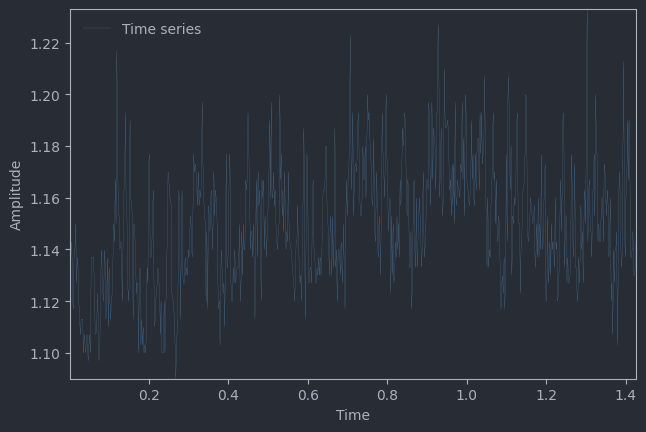

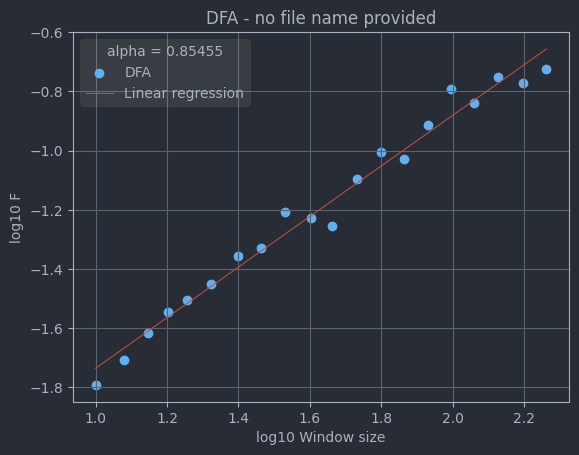

(0.8545543743728518, -2.58963454244733)

In [51]:
DFA.DFA_F_Plot(x_data, y_data, window_size_step=20, plot_time_series=True)

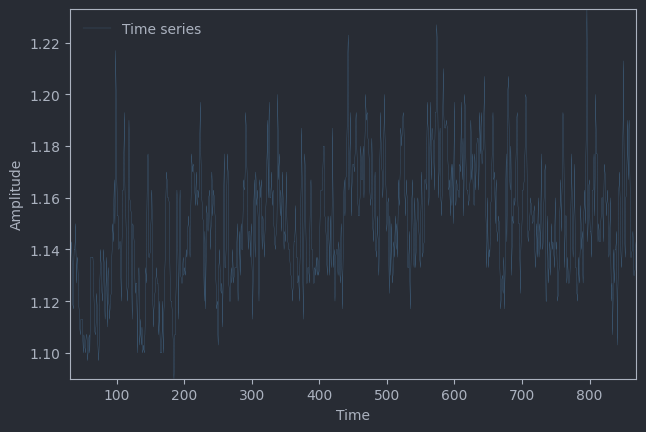

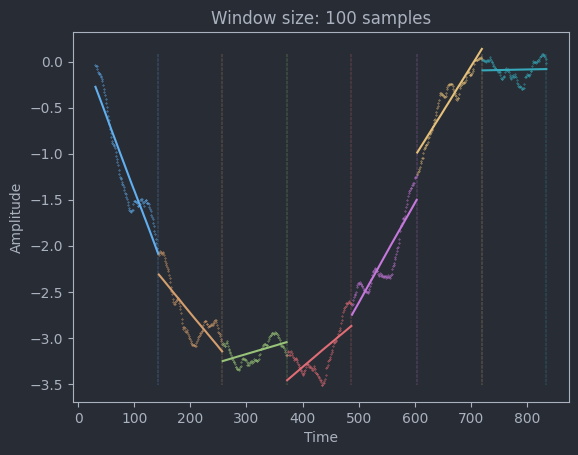

tensor(0.1622)

In [52]:
DFA.DFA_Method(x_data, y_data, 100, plot_epochs=True, plot_time_series=True)

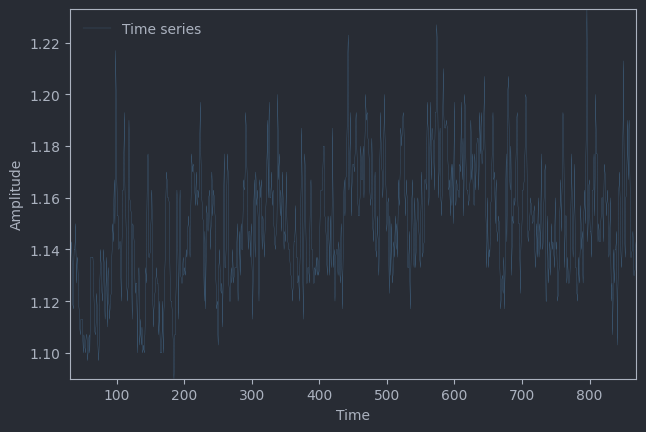

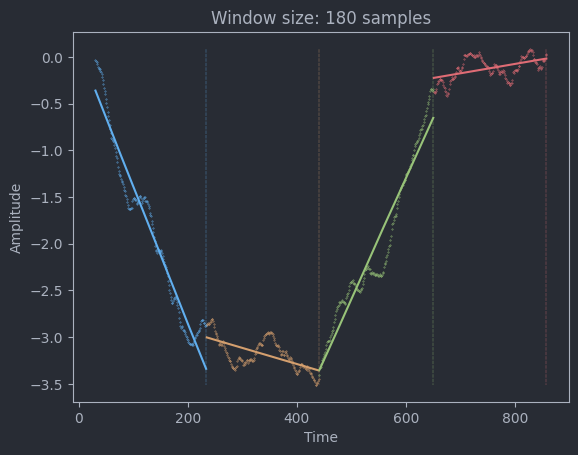

tensor(0.1690)

In [53]:
DFA.DFA_Method(x_data, y_data, 180, plot_epochs=True, plot_time_series=True)